In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

In [3]:
df = pd.read_csv(data_path)
df.head()

,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,hot_water,...,beachfront,building_staff,lat,lng,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,booking_earned
0,1,1,1,2,1,0,0,1,1,1,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,5911197.97
1,1,1,1,2,1,0,0,1,1,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.458603,4.0,5911197.97
2,1,2,1,2,1,0,0,0,1,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,5911197.97
3,1,2,1,2,1,0,0,0,1,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.455450,4.0,5911197.97
4,1,3,1,2,1,0,0,0,1,0,...,1,0,-8.805646,115.113378,15.6035,81,4,0.452298,4.0,5911197.97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50728 entries, 0 to 50727
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   bedroom                 50728 non-null  int64  
 1   bathroom                50728 non-null  int64  
 2   beds                    50728 non-null  int64  
 3   guests                  50728 non-null  int64  
 4   wifi                    50728 non-null  int64  
 5   tv                      50728 non-null  int64  
 6   cable_tv                50728 non-null  int64  
 7   ac                      50728 non-null  int64  
 8   workspace               50728 non-null  int64  
 9   hot_water               50728 non-null  int64  
 10  parking                 50728 non-null  int64  
 11  pool                    50728 non-null  int64  
 12  gym                     50728 non-null  int64  
 13  private_entrance        50728 non-null  int64  
 14  luggage_drop_off        50728 non-null

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# numeric_columns = df.select_dtypes(include=['number'])
# numeric_df = numeric_columns.drop(columns=['average_daily_rate'])

# Separate features and target variable
X = df.drop(columns=['booking_earned'])  # Features
y = df['booking_earned']  # Target variable

# Melakukan standarisasi pada fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.2min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.2min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.1min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.2min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=500, subsample=1.0; total time= 1.4min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.1min
[CV] END learning_rate=0.5, max_depth=7, min_samples_leaf=1, min_samples_split=5, n_estimators=500, subsample=1.0; total time= 1.3min
[C

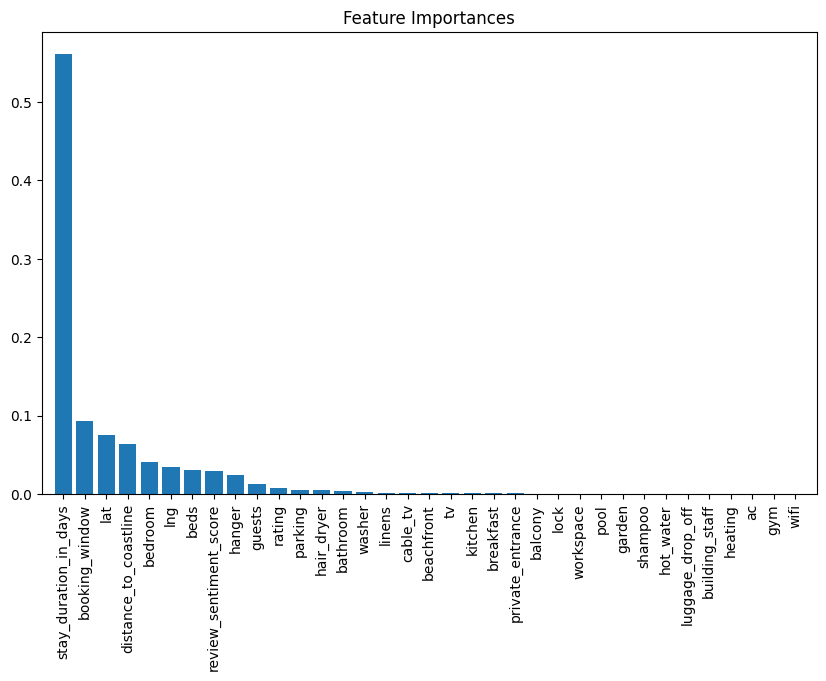

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Definisi grid parameter yang akan dijelajahi
param_grid = {
    'n_estimators': [500],
    'learning_rate': [0.5],
    'max_depth': [7],
    'subsample': [1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, verbose=2)

# Melatih model pada data
grid_search.fit(X_train, y_train)

# Mendapatkan model terbaik
best_gb_regressor = grid_search.best_estimator_

# Get feature importances from the best model
feature_importances = best_gb_regressor.feature_importances_

# Create a DataFrame to store feature importances with corresponding column names
fi_df = pd.DataFrame({'Feature': X.columns, 
                      'Importance': feature_importances})

# Sort the DataFrame by feature importance values
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Memprediksi pada set pengujian
y_pred = best_gb_regressor.predict(X_test)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Visualisasi feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(fi_df)), fi_df['Importance'], align='center')
plt.xticks(range(len(fi_df)), fi_df['Feature'], rotation=90)
plt.xlim([-1, len(fi_df)])
plt.show()